# 1. Pendahuluan

Deskripsi singkat dataset (UK Online Retail, 2010–2011).

Tujuan EDA: memahami perilaku transaksi, customer, produk, dan tren bisnis.

In [ ]:
from google.colab import files
import pandas as pd

# Upload file Online Retail.xlsx
uploaded = files.upload()

# Load dataset
df = pd.read_excel("Online Retail.xlsx", sheet_name="Online Retail")
df.head()

Saving Online Retail.xlsx to Online Retail.xlsx


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Data Preparation (Cleaning)

Import Library & Data

pandas, numpy, matplotlib, seaborn

Cek Missing Values

Tampilkan jumlah & persentase missing.

Insight: Data mengandung retur, transaksi tanpa customer, duplikat. Setelah dibersihkan, dataset lebih siap untuk analisis.

In [ ]:
# Cek jumlah dan persentase missing values
missing_data = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    "Missing Values": missing_data,
    "Percentage (%)": missing_percent
})

missing_summary


,Missing Values,Percentage (%)
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135080,24.93
Country,0,0.00


In [ ]:
# Hitung jumlah data duplikat
duplicates_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates_count}")


Jumlah data duplikat: 5268


In [ ]:
# Transaksi dengan Quantity <= 0
print("Contoh Quantity <= 0")
display(df[df['Quantity'] <= 0].head())

# Transaksi dengan UnitPrice <= 0
print("Contoh UnitPrice <= 0")
display(df[df['UnitPrice'] <= 0].head())


Contoh Quantity <= 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Contoh UnitPrice <= 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [ ]:
# Import library analisis & visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style default seaborn biar lebih rapi
sns.set(style="whitegrid")


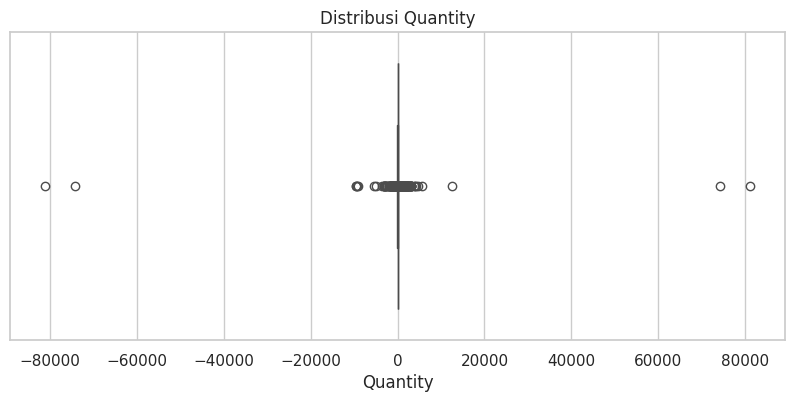

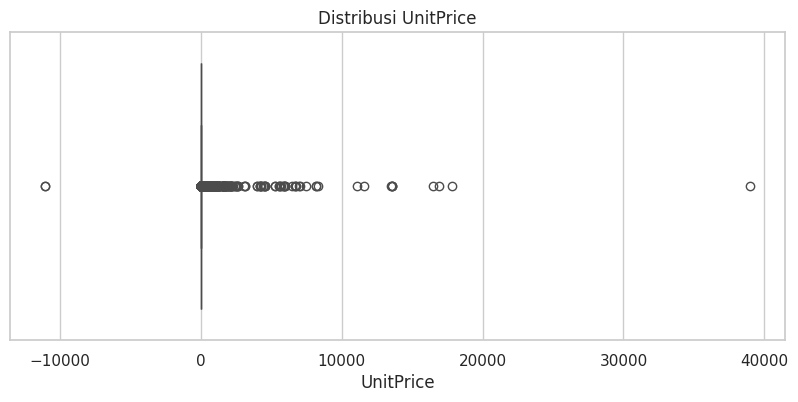

In [ ]:
# Distribusi Quantity
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Quantity'])
plt.title("Distribusi Quantity")
plt.show()

# Distribusi UnitPrice
plt.figure(figsize=(10,4))
sns.boxplot(x=df['UnitPrice'])
plt.title("Distribusi UnitPrice")
plt.show()


In [ ]:
date_min = df['InvoiceDate'].min()
date_max = df['InvoiceDate'].max()
print(f"Periode transaksi: {date_min} s.d. {date_max}")



Periode transaksi: 2010-12-01 08:26:00 s.d. 2011-12-09 12:50:00


In [ ]:
# Hapus missing pada kolom penting
df = df.dropna(subset=["CustomerID", "Description"])

# Hapus duplikasi
df = df.drop_duplicates()

# Hapus data aneh (Quantity <= 0 atau UnitPrice <= 0)
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Tambahkan kolom TotalPrice
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Pastikan InvoiceDate format datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [ ]:
# Export ke CSV
df.to_csv("OnlineRetail_clean.csv", index=False)

# Download file CSV ke laptop
files.download("OnlineRetail_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload file bersih (hasil cleaning sebelumnya)
uploaded = files.upload()

# Load dataset bersih
df = pd.read_csv("OnlineRetail_clean.csv")

# Cek struktur
print(df.info())
df.head()


Saving OnlineRetail_clean.csv to OnlineRetail_clean (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  int64  
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
 8   TotalPrice   392692 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# 3. Data Understanding

a. Statistik Dasar

b. Ringkasan Statistik (describe())

c. Rata-rata Perilaku

d. Distribusi

Insight:

Produk ±3.500 unik, customer ±4.000, negara ±35.

Mayoritas order kecil, tapi ada transaksi grosir.

Rata-rata AOV sekitar ratusan GBP.

In [ ]:
# Jumlah transaksi unik
print("Jumlah transaksi:", df["InvoiceNo"].nunique())

# Jumlah customer unik
print("Jumlah customer:", df["CustomerID"].nunique())

# Total revenue
print("Total revenue:", df["TotalPrice"].sum())

# Ringkasan statistik
df.describe()


Jumlah transaksi: 18532
Jumlah customer: 4338
Total revenue: 8887208.894


,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,560590.875047,13.119702,3.125914,15287.843865,22.631500
std,13087.063759,180.492832,22.241836,1713.539549,311.099224
min,536365.000000,1.000000,0.001000,12346.000000,0.001000
25%,549234.000000,2.000000,1.250000,13955.000000,4.950000
50%,561874.000000,6.000000,1.950000,15150.000000,12.450000
75%,572061.000000,12.000000,3.750000,16791.000000,19.800000
max,581587.000000,80995.000000,8142.750000,18287.000000,168469.600000


# 4. Analisis Produk dan Negara

a. Top 10 Produk Terlaris (Quantity)

b. Top 10 Produk Berdasarkan Revenue

c. Produk dengan Return Terbanyak

d. Top 10 Negara (selain UK)

e. Kontribusi UK vs Non-UK

Insight: Penjualan sangat dipengaruhi oleh produk tertentu (efek Pareto).

Insight: UK tetap pasar utama, tapi ada potensi ekspansi ke negara lain.

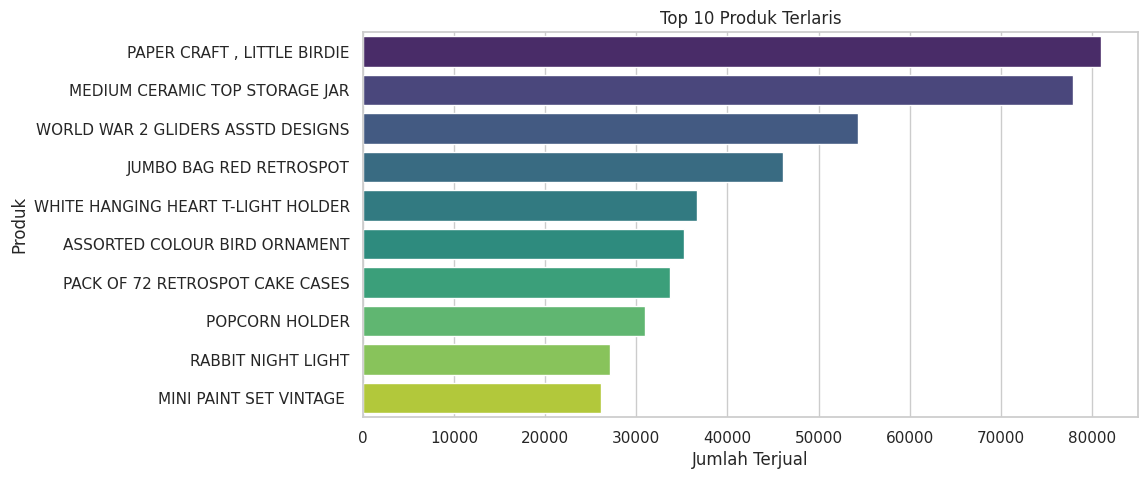

In [ ]:
# Top 10 produk berdasarkan jumlah terjual
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_products,
    x="Quantity",
    y="Description",
    hue="Description",
    palette="viridis",
    legend=False
)
plt.title("Top 10 Produk Terlaris")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Produk")
plt.show()


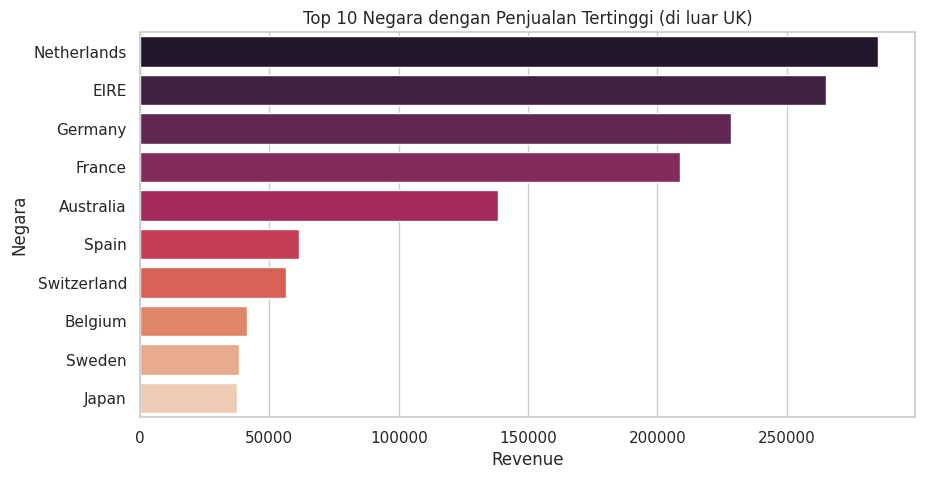

In [ ]:
# Penjualan per negara (kecuali UK biar lebih jelas)
top_countries = df[df["Country"] != "United Kingdom"].groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_countries,
    x="TotalPrice",
    y="Country",
    hue="Country",
    palette="rocket",
    legend=False
)
plt.title("Top 10 Negara dengan Penjualan Tertinggi (di luar UK)")
plt.xlabel("Revenue")
plt.ylabel("Negara")
plt.show()


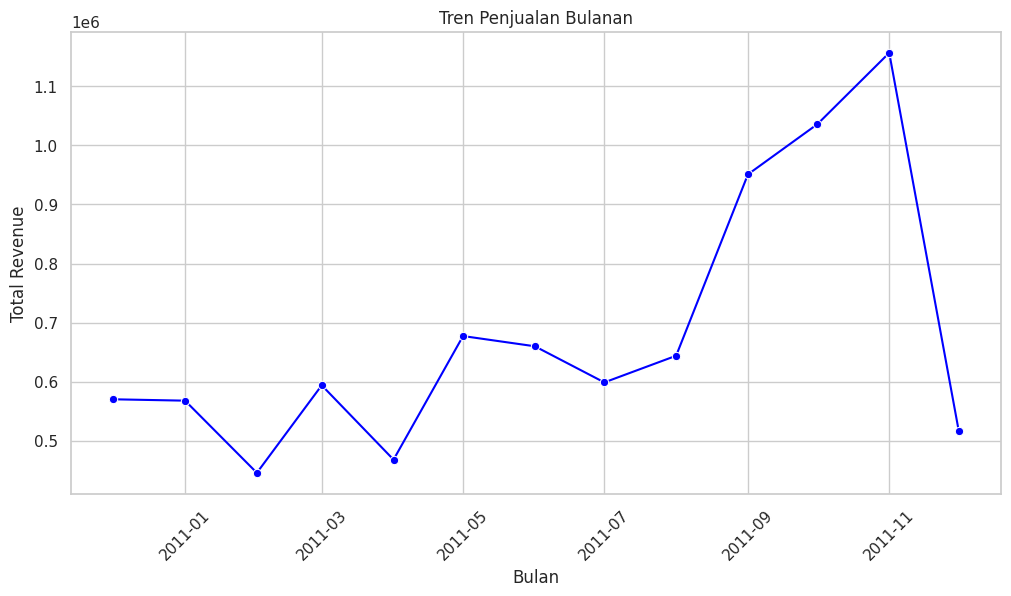

In [ ]:
df["InvoiceMonth"] = pd.to_datetime(df["InvoiceDate"]).dt.to_period("M").dt.to_timestamp()

monthly_sales = df.groupby("InvoiceMonth")["TotalPrice"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_sales,
    x="InvoiceMonth",
    y="TotalPrice",
    marker="o",
    color="blue"
)
plt.title("Tren Penjualan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


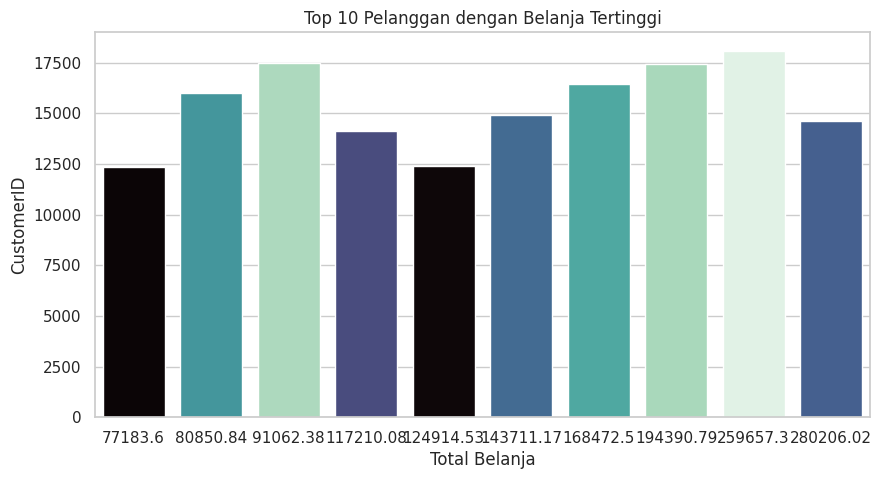

In [ ]:
# Top 10 pelanggan berdasarkan total belanja
top_customers = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_customers,
    x="TotalPrice",
    y="CustomerID",
    hue="CustomerID",
    palette="mako",
    legend=False
)
plt.title("Top 10 Pelanggan dengan Belanja Tertinggi")
plt.xlabel("Total Belanja")
plt.ylabel("CustomerID")
plt.show()


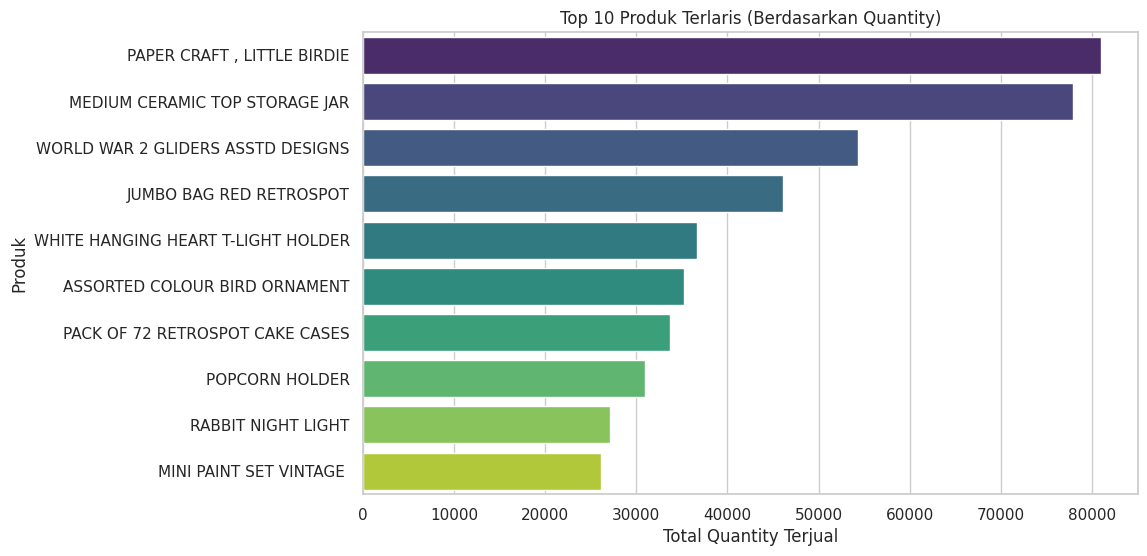

In [ ]:
# Top 10 produk berdasarkan quantity
top_products = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x="Quantity", y="Description", hue="Description", palette="viridis", dodge=False, legend=False)
plt.title("Top 10 Produk Terlaris (Berdasarkan Quantity)")
plt.xlabel("Total Quantity Terjual")
plt.ylabel("Produk")
plt.show()


# 5. Analisis Customer

a. Top 10 Customer berdasarkan Revenue

b. Pareto Principle (20% Customer = 80% Revenue?)

Insight: Customer high-value sangat penting untuk bisnis → perlu strategi retensi khusus.

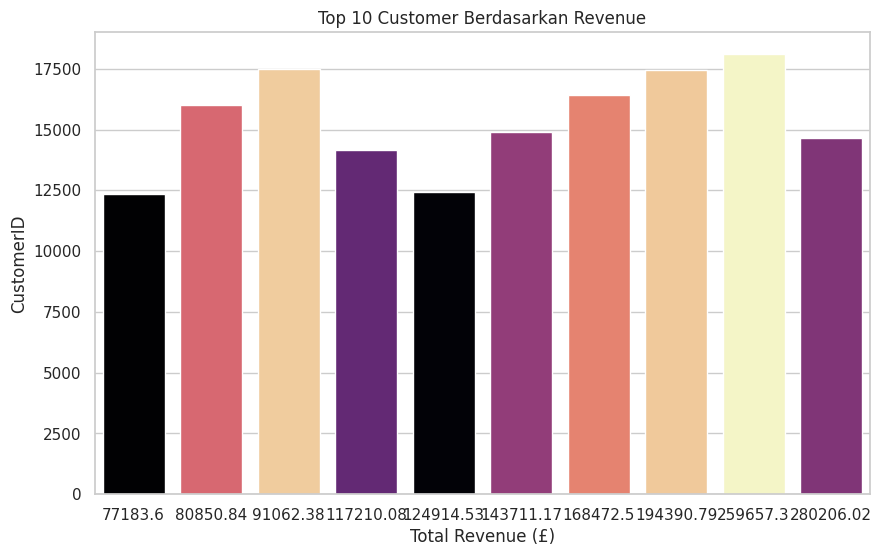

In [ ]:
top_customers = (
    df.groupby("CustomerID")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_customers, x="TotalPrice", y="CustomerID", hue="CustomerID", palette="magma", dodge=False, legend=False)
plt.title("Top 10 Customer Berdasarkan Revenue")
plt.xlabel("Total Revenue (£)")
plt.ylabel("CustomerID")
plt.show()


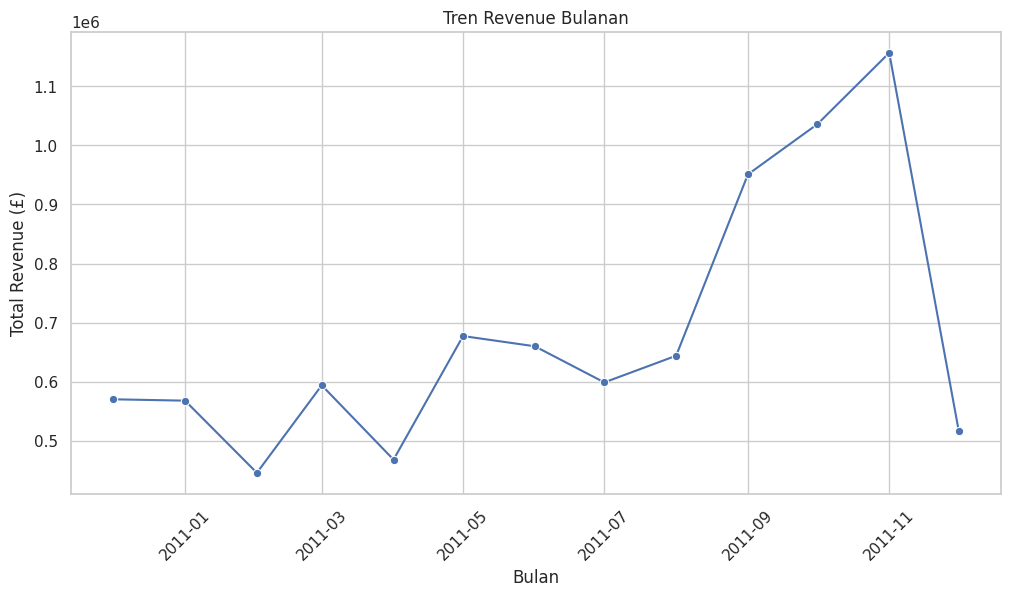

In [ ]:
# Pastikan kolom InvoiceDate benar-benar datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Buat kolom Year-Month dalam bentuk datetime (ambil awal bulan)
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M").dt.to_timestamp()

monthly_sales = df.groupby("YearMonth")["TotalPrice"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="YearMonth", y="TotalPrice", marker="o")
plt.title("Tren Revenue Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Total Revenue (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
print("Jumlah produk unik:", df['Description'].nunique())


Jumlah produk unik: 3877


In [ ]:
print("Jumlah negara:", df['Country'].nunique())
print("Daftar negara:", df['Country'].unique())


Jumlah negara: 37
Daftar negara: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [ ]:
avg_tx_per_customer = df.groupby("CustomerID")["InvoiceNo"].nunique().mean()
print(f"Rata-rata transaksi per customer: {avg_tx_per_customer:.2f}")


Rata-rata transaksi per customer: 4.27


In [ ]:
avg_order_value = df.groupby("InvoiceNo")["TotalPrice"].sum().mean()
print(f"Rata-rata nilai transaksi: {avg_order_value:.2f}")


Rata-rata nilai transaksi: 479.56


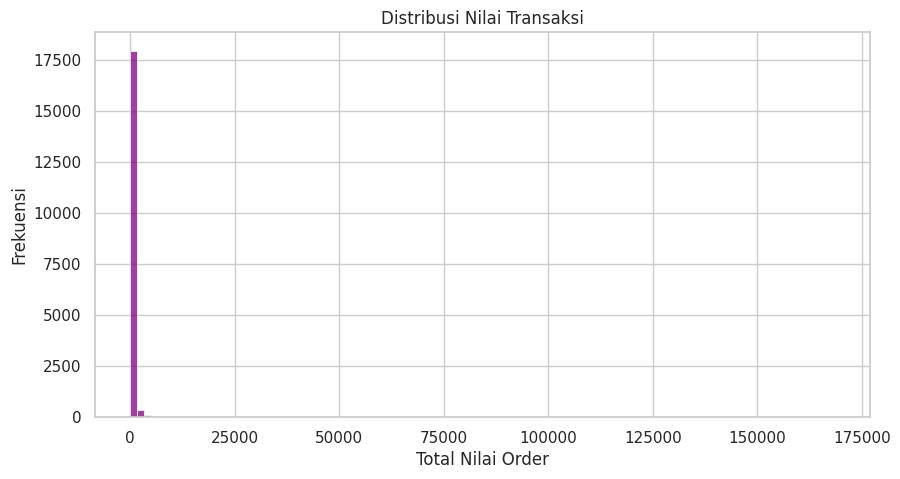

In [ ]:
order_value = df.groupby("InvoiceNo")["TotalPrice"].sum()

plt.figure(figsize=(10,5))
sns.histplot(order_value, bins=100, color="purple")
plt.title("Distribusi Nilai Transaksi")
plt.xlabel("Total Nilai Order")
plt.ylabel("Frekuensi")
plt.show()


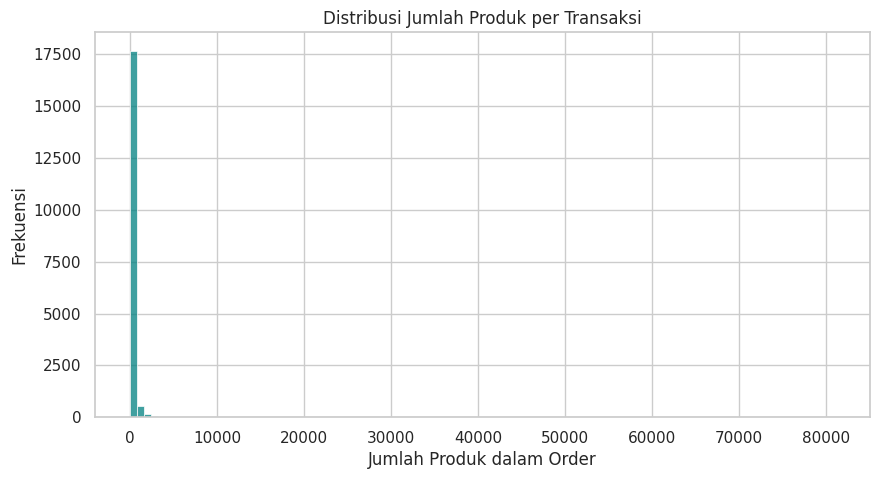

In [ ]:
basket_size = df.groupby("InvoiceNo")["Quantity"].sum()

plt.figure(figsize=(10,5))
sns.histplot(basket_size, bins=100, color="teal")
plt.title("Distribusi Jumlah Produk per Transaksi")
plt.xlabel("Jumlah Produk dalam Order")
plt.ylabel("Frekuensi")
plt.show()


In [ ]:
avg_order_value = df.groupby("InvoiceNo")["TotalPrice"].sum().mean()
print(f"Rata-rata nilai order (AOV): {avg_order_value:.2f} GBP")


Rata-rata nilai order (AOV): 479.56 GBP


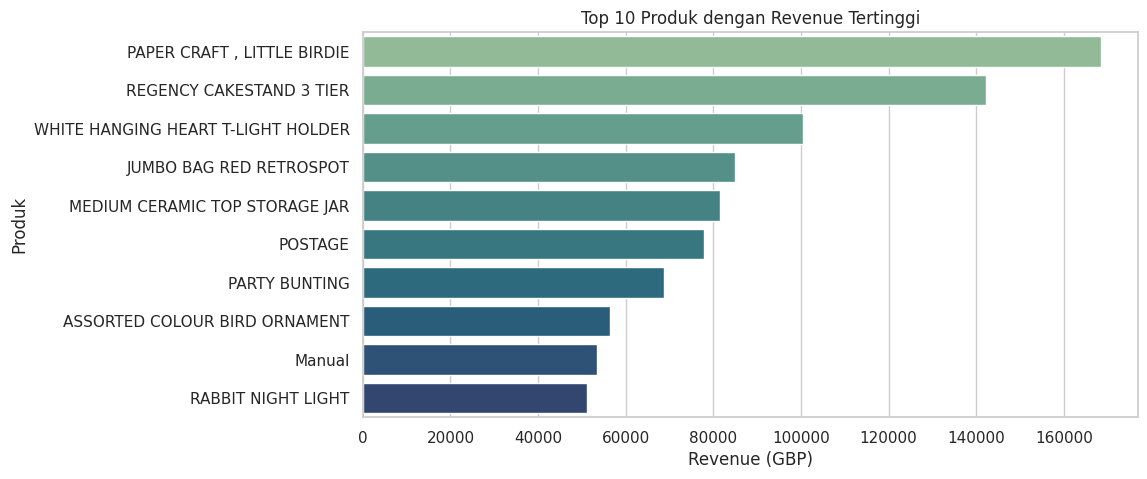

In [ ]:
top_products_revenue = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_products_revenue,
    x="TotalPrice", y="Description",
    hue="Description",     # tambahkan hue = y
    legend=False,          # supaya legend tidak muncul dobel
    palette="crest"
)
plt.title("Top 10 Produk dengan Revenue Tertinggi")
plt.xlabel("Revenue (GBP)")
plt.ylabel("Produk")
plt.show()


In [ ]:
country_sales = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
country_share = (country_sales / country_sales.sum() * 100).round(2)

print(country_share.head())


Country
United Kingdom    81.97
Netherlands        3.21
EIRE               2.98
Germany            2.57
France             2.35
Name: TotalPrice, dtype: float64


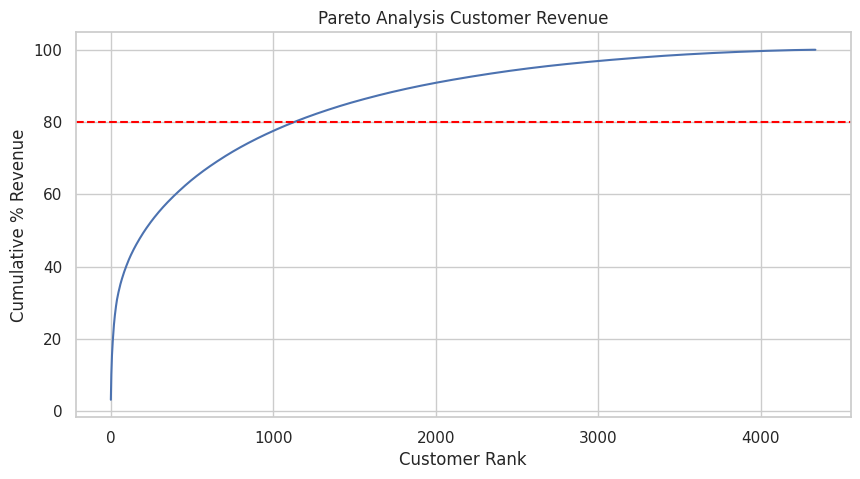

In [ ]:
customer_revenue = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).reset_index()
customer_revenue["cum_percentage"] = customer_revenue["TotalPrice"].cumsum() / customer_revenue["TotalPrice"].sum() * 100

plt.figure(figsize=(10,5))
sns.lineplot(data=customer_revenue, x=customer_revenue.index, y="cum_percentage")
plt.axhline(80, color="red", linestyle="--")
plt.title("Pareto Analysis Customer Revenue")
plt.xlabel("Customer Rank")
plt.ylabel("Cumulative % Revenue")
plt.show()


# 6. Analisis Waktu

Tren Musiman

Insight: Penjualan fluktuatif dengan puncak akhir tahun → strategi promosi musiman bisa efektif.

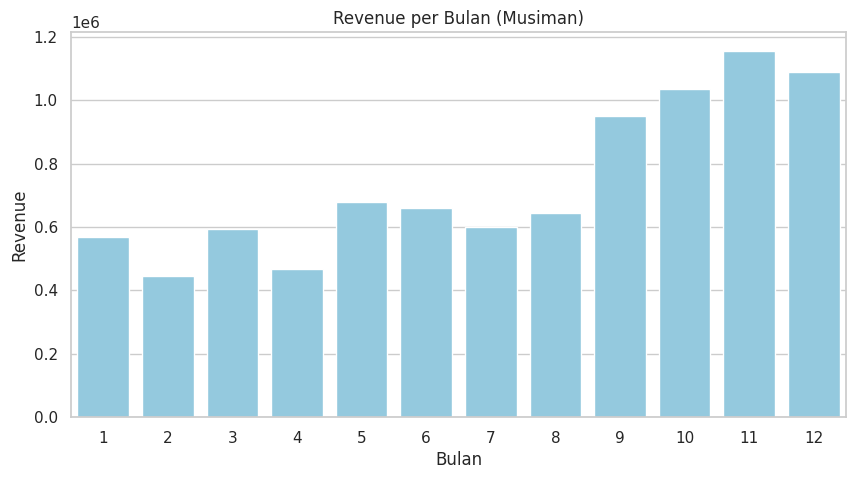

In [ ]:
df['Month'] = df['InvoiceDate'].dt.month
monthly = df.groupby("Month")["TotalPrice"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=monthly, x="Month", y="TotalPrice", color="skyblue"   # pakai color, bukan palette
)
plt.title("Revenue per Bulan (Musiman)")
plt.xlabel("Bulan")
plt.ylabel("Revenue")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Tentukan tanggal referensi (hari terakhir transaksi)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Hitung RFM untuk setiap customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'      # Monetary
}).reset_index()

# Rename kolom
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [ ]:
# Skor Recency (semakin kecil recency = semakin bagus)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])

# Skor Frequency & Monetary (semakin tinggi semakin bagus)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

# Gabungkan skor jadi segmen RFM
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,114,6
1,12347.0,2,7,4310.00,4,4,4,444,12
2,12348.0,75,4,1797.24,2,3,4,234,9
3,12349.0,19,1,1757.55,3,1,4,314,8
4,12350.0,310,1,334.40,1,1,2,112,4


In [ ]:
def segment_customer(df):
    if df['RFM_Score'] >= 9:
        return 'Best Customers'
    elif df['RFM_Score'] >= 7:
        return 'Loyal Customers'
    elif df['RFM_Score'] >= 5:
        return 'Potential Loyalists'
    else:
        return 'At Risk / Lost'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm['Segment'].value_counts()


,count
Segment,
Best Customers,1677
Potential Loyalists,989
Loyal Customers,866
At Risk / Lost,806


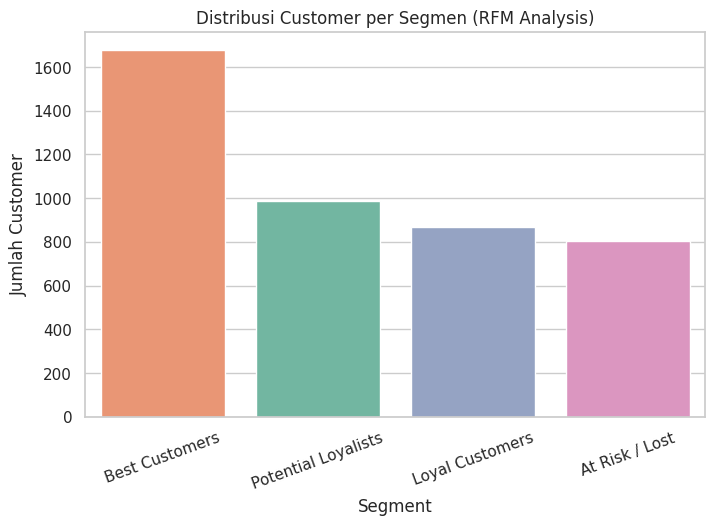

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(
    data=rfm,
    x="Segment",
    hue="Segment",                     # tambahkan hue
    order=rfm['Segment'].value_counts().index,
    palette="Set2",
    legend=False                       # supaya legend tidak muncul
)
plt.title("Distribusi Customer per Segmen (RFM Analysis)")
plt.xlabel("Segment")
plt.ylabel("Jumlah Customer")
plt.xticks(rotation=20)
plt.show()



In [ ]:
# ================================
# 🔹 RFM Analysis – UK Retail Data
# ================================

import pandas as pd
from datetime import timedelta

# 1. Tentukan reference date (sehari setelah transaksi terakhir)
reference_date = df['InvoiceDate'].max() + timedelta(days=1)

# 2. Hitung Recency, Frequency, Monetary per customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

# Rename kolom
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# 3. Buat Skor R, F, M
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])  # Recency: semakin kecil semakin baik
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])  # Frequency
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])  # Monetary

# 4. Hitung RFM Score total
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

# 5. Buat Segmen Customer
def segment_customer(x):
    if x['RFM_Score'] >= 9:
        return 'Best Customers'
    elif x['RFM_Score'] >= 7:
        return 'Loyal Customers'
    elif x['RFM_Score'] >= 5:
        return 'Potential Loyalists'
    else:
        return 'At Risk / Lost'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


In [ ]:
rfm.to_csv("rfm_result.csv", index=False)


In [ ]:
from google.colab import files
files.download("rfm_result.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>